In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from preprocessing import prepare_data
import numpy as np
import xgboost as xgb

model = xgb.XGBClassifier()
model.load_model("models/xgb_champion.json")
import joblib

encoders = joblib.load("models/encoders.joblib")



In [2]:
df = pd.read_csv("fraudTest.csv")

In [5]:
out_test = prepare_data(
    df,
    mode="tree",
    training=False,
    fit=False,
    encoders=encoders,
    scalers={},
)

In [8]:
df_test = out_test["df"]
X_test = df_test.drop("is_fraud", axis=1)
y_test = df_test["is_fraud"]

X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0).clip(-1e6, 1e6)

<Figure size 640x480 with 0 Axes>

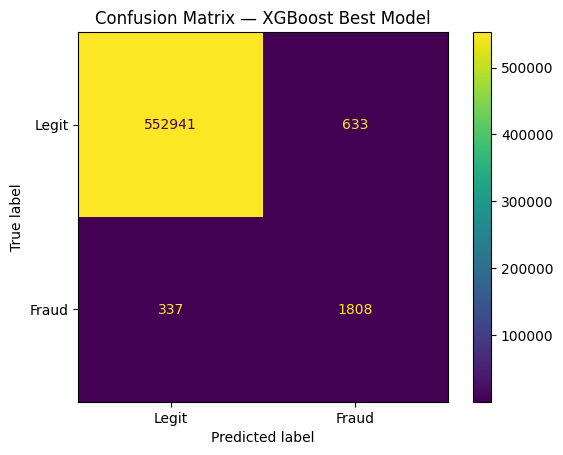

Confusion Matrix:
 [[552941    633]
 [   337   1808]]


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Predict using loaded model
y_pred = model.predict(X_test)

# 2. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# 3. Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legit", "Fraud"])
plt.figure()
disp.plot()
plt.title("Confusion Matrix — XGBoost Best Model")

plt.savefig("confusion_matrix_xgb.png", dpi=300, bbox_inches='tight')
plt.show()

print("Confusion Matrix:\n", cm)
